In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from load_auto import load_auto 
from utils import train_linear_model, plot_cost_history

# Data Ingestion

In [3]:
X_train, y_train = load_auto()

In [4]:
X_train.shape

(392, 7)

In [5]:
y_train.shape

(392, 1)

# Normalize the input variables

In [6]:
X_train_normalized = (X_train - np.mean(X_train)) / np.std(X_train)

# Train two linear models

In [7]:
num_iterations = 10**6
learning_rate = 10**(-1)

# Train on only horsepower (third column)
weight_1, offset_1, history_1 = train_linear_model(X_train_normalized[:, 3].reshape(-1, 1), y_train, num_iterations, learning_rate)
# Train on all parameters except name
weight_2, offset_2, history_2 = train_linear_model(X_train_normalized, y_train, num_iterations, learning_rate)

print(f"Final loss for horsepower: {history_1[-1]}")
print(f"Final loss for all but name: {history_2[-1]}")

Final loss for horsepower: 18.6766165974193
Final loss for all but name: 11.868786013810485


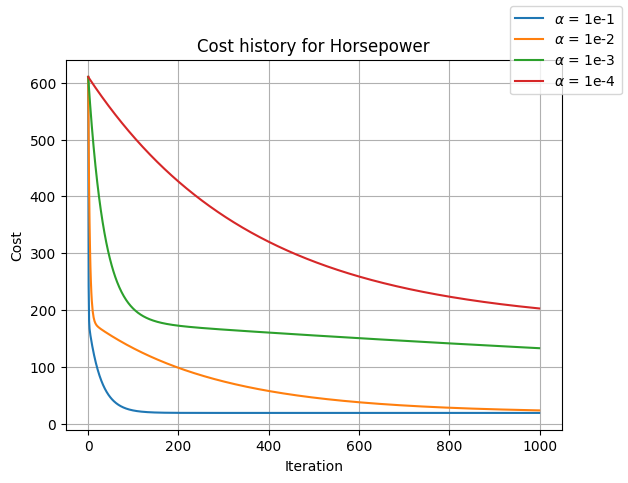

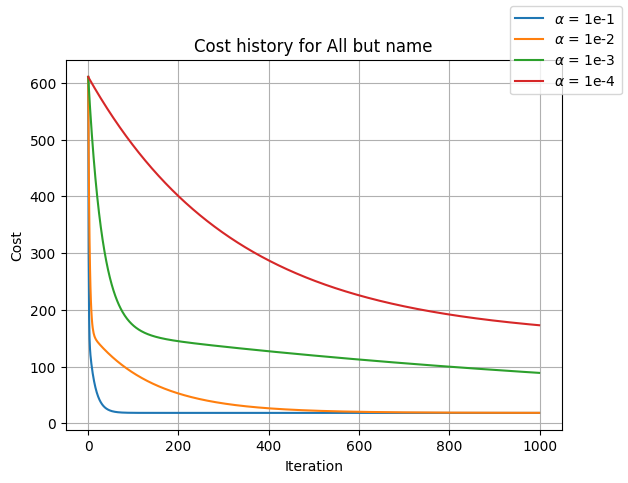

In [8]:
learning_rate_vec = [-1, -2, -3, -4]
training_sets = [X_train_normalized[:, 3].reshape(-1, 1), X_train_normalized]
titles = ["Horsepower", "All but name"]

for X_train, title in zip(training_sets, titles):
    learning_rate_cost = []
    fig, ax = plt.subplots()
    for learning_rate in learning_rate_vec:
        weight, offset, history = train_linear_model(X_train, y_train, 10**3, 10**(learning_rate))
        learning_rate_cost.append(history[-1])
        plot_cost_history(learning_rate, history, ax)
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Cost")
    ax.set_title(f"Cost history for {title}")
    ax.grid()
    fig.legend()

In [9]:
import numpy as np

# Define the feature matrix X and the target variable y
X = X_train_normalized[:, 3].reshape(-1, 1)
y = y_train

# Add a column of ones to X for the bias term
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Calculate the optimal parameters using the normal equation
parameters = np.linalg.inv(X.T @ X) @ X.T @ y

# Separate the bias term and the coefficients
bias = parameters[0]
coefficients = parameters[1:]

# Print the parameters
print("Bias:", bias)
print("Coefficients:", coefficients)


Bias: [42.52937479]
Coefficients: [[-8.18840662]]


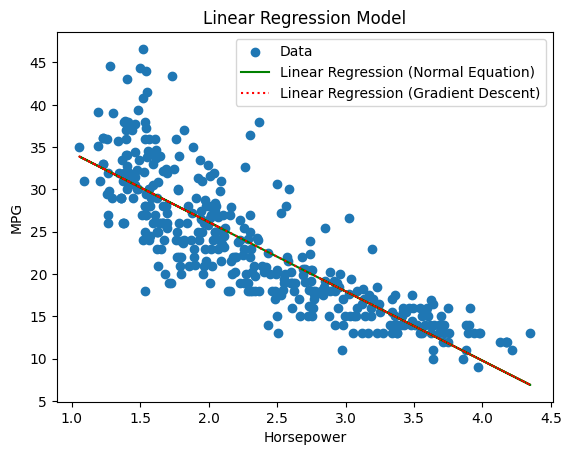

In [15]:
plt.scatter(X_train_normalized[:, 3], y_train, label="Data")
plt.plot(X_train_normalized[:, 3], X_train_normalized[:, 3] * coefficients[0] + bias[0], color='green', linestyle="solid", label="Linear Regression (Normal Equation)")

plt.plot(X_train_normalized[:, 3], X_train_normalized[:, 3] * weight_1[0] + offset_1, color='red', linestyle= "dotted", label="Linear Regression (Gradient Descent)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression Model")
plt.legend()
plt.show()